In [8]:
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

rcParams['figure.figsize'] = 12,9
pd.options.display.max_rows = 3000

In [9]:
# dataset from https://stats2.digitalresources.jisc.ac.uk/Index.aspx?DataSetCode=WDI# 
# and data about oil (brent) cost from https://www.macrotrends.net/2480/brent-crude-oil-prices-10-year-daily-chart

# GDP analys 

## Main countrys stats

### проверим известное утверждение (и поймем масштабы бедствия :D) о том, что GPD (and IGS) России сильно зависит от цен на нефть

In [10]:
gdp = pd.read_csv('gdp2010.csv')
# gdp = gdp[['Location','Time', 'Value']]
gdp.head()


,LOCATION,Location,SUBJECT,Subject,TIME,Time,Value,Flag Codes,Flags
0,EAR,Early-demographic dividend,NY-GDP-MKTP-CD,GDP (current US$),2010,2010,8.547106e+12,NaN,NaN
1,EAR,Early-demographic dividend,NY-GDP-MKTP-CD,GDP (current US$),2011,2011,9.582349e+12,NaN,NaN
2,EAR,Early-demographic dividend,NY-GDP-MKTP-CD,GDP (current US$),2012,2012,1.004625e+13,NaN,NaN
3,EAR,Early-demographic dividend,NY-GDP-MKTP-CD,GDP (current US$),2013,2013,1.022993e+13,NaN,NaN
4,EAR,Early-demographic dividend,NY-GDP-MKTP-CD,GDP (current US$),2014,2014,1.059492e+13,NaN,NaN


<BarContainer object of 14 artists>

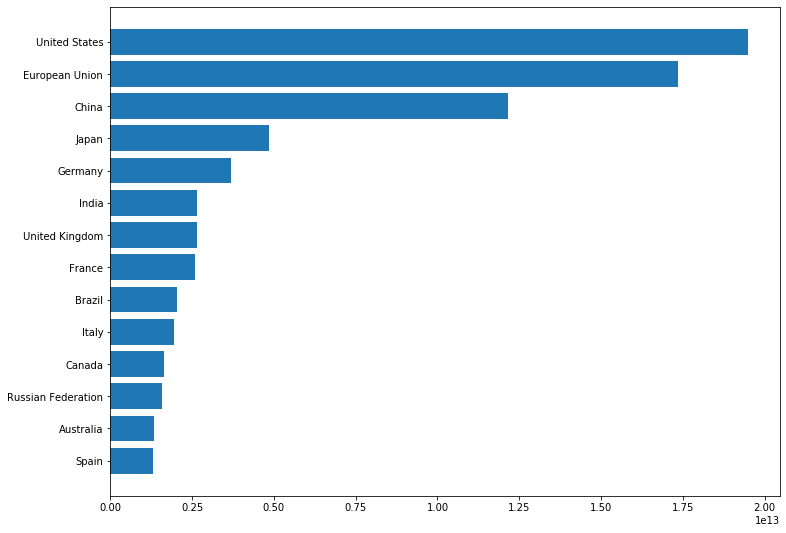

In [11]:
gdp_filtr = gdp[(gdp['Location'].isin(['Russian Federation',
                                       'United States',
                                       'European Union',
                                       'China',
                                       'Australia',
                                       'Germany',
                                       'Japan', 
                                       'United Kingdom', 
                                       'India', 
                                       'France',
                                       'Italy',
                                       'Brazil', 
                                       'Canada',
                                       'Spain']))].sort_values('Value')

plt.barh(gdp_filtr[gdp_filtr['Time']==2017]['Location'],
         gdp_filtr[gdp_filtr['Time']==2017]['Value'])

# 'World', 'Finland'

In [12]:
fig = px.choropleth(gdp[(gdp['Time'] == 2017) & (gdp['Value'] < 5*(10**12))], 
                    locations="LOCATION",
                    color="Value",
                    hover_name="Location",
                    color_continuous_scale=px.colors.sequential.Plasma,
                   )
fig.show()

Россия не входит даже в top10 стран по ВВП (при том что по площади, страна занимает 1 место, а по численности населения - 9, почти по всем полезным ископаемым тоже входит в top10).

Возможно это говорит о неоптимальном рассходовании ресурсов.

# GDP dinamics analys

In [13]:
gdp_dinamics = gdp[(gdp['Location'].isin(['Russian Federation',
                                       'United States',
                                       'European Union',
                                       'China',
#                                        'Australia',
#                                        'Germany',
#                                        'Japan', 
#                                        'United Kingdom',
                                       'India', 
#                                        'France',
#                                        'Iataly', 
#                                        'Brazil', 
#                                        'Canada',
#                                        'Spain'
                                      ]))]
# 'World','European Union','Finland'
gdp_dinamics = gdp_dinamics.pivot(index = 'Time', columns = 'Location', values =  'Value' )
gdp_dinamics.head()

Location,China,European Union,India,Russian Federation,United States
Time,,,,,
2010,6.087165e+12,1.700961e+13,1.675615e+12,1.524917e+12,1.499205e+13
2011,7.551500e+12,1.837432e+13,1.823050e+12,2.051662e+12,1.554258e+13
2012,8.532231e+12,1.731686e+13,1.827638e+12,2.210257e+12,1.619701e+13
2013,9.570406e+12,1.805272e+13,1.856722e+12,2.297128e+12,1.678485e+13
2014,1.043853e+13,1.866867e+13,2.039127e+12,2.059984e+12,1.752175e+13


In [15]:
l = len(gdp_dinamics)
for i in range(l):
    if i == l-1:
        gdp_dinamics.iloc[l-i-1] /= gdp_dinamics.iloc[l-i-1]
    else:
        gdp_dinamics.iloc[l-i-1] /=  gdp_dinamics.iloc[l-i-2]

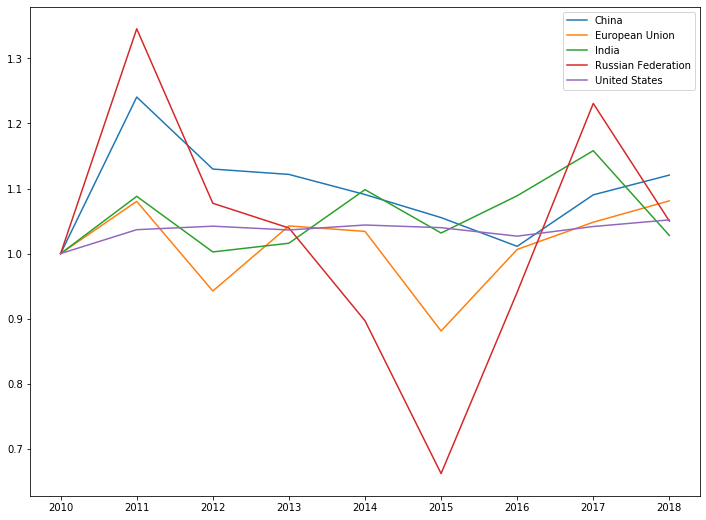

In [16]:
plt.plot(gdp_dinamics)
plt.legend(gdp_dinamics)

Динамика ВВП В России кране не стабильно по отношении к динамике других стран.

Почему такое может быть?

Далее добавим к этим данным динамику катировок нефти и посмотрим зависимость ВВП от цен на нефть.

# ADD oil

In [17]:
dict = {2010:80.32,2011:112.41,2012:110.70,
        2013:108.69, 2014:97.64, 2015:53.41,
        2016:46.10, 2017:55.55, 2018:71.38}

oil = pd.DataFrame.from_dict(dict, orient='index')\
                .reset_index().rename(columns={0:'Oil', 'index': 'Time'})


for i in range(len(oil)):
    if i == l-1:
        oil['Oil'][0] = 1
    else:
        oil['Oil'][l-i-1] /=  oil['Oil'][l-i-2]

# plt.plot(oil['Oil'])

/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
gdp_oil = gdp_dinamics.reset_index().merge(oil, how = 'left', on = 'Time')
gdp_oil = gdp_oil.set_index('Time')
gdp_oil.head()

,China,European Union,India,Russian Federation,United States,Oil
Time,,,,,,
2010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2011,1.240561,1.080231,1.087988,1.345425,1.036721,1.399527
2012,1.129872,0.942450,1.002517,1.077301,1.042105,0.984788
2013,1.121677,1.042494,1.015914,1.039304,1.036293,0.981843
2014,1.090709,1.034119,1.098241,0.896765,1.043903,0.898335


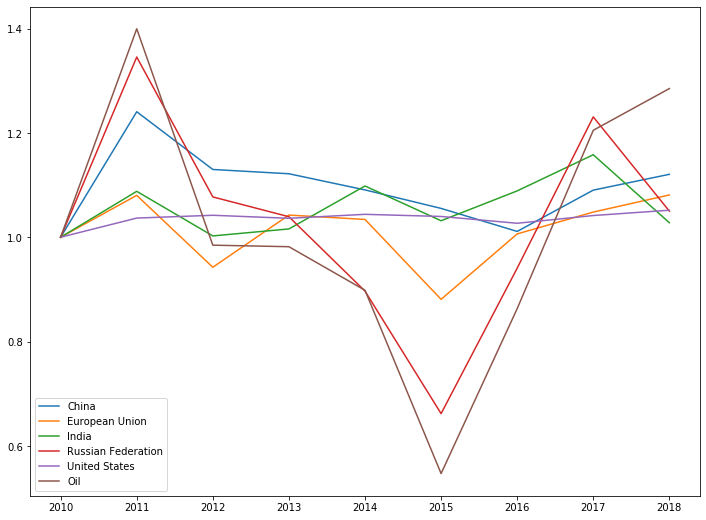

In [19]:
plt.plot(gdp_oil)
plt.legend(gdp_oil)

ВВП России ведет себя также как и цены на нефть.

Однако, из интересных фактов можно заметить, что в 2018 году, не смотря на то что динамика цены нефти brent была восходящей, ВВП России все равно не выросло год к году.


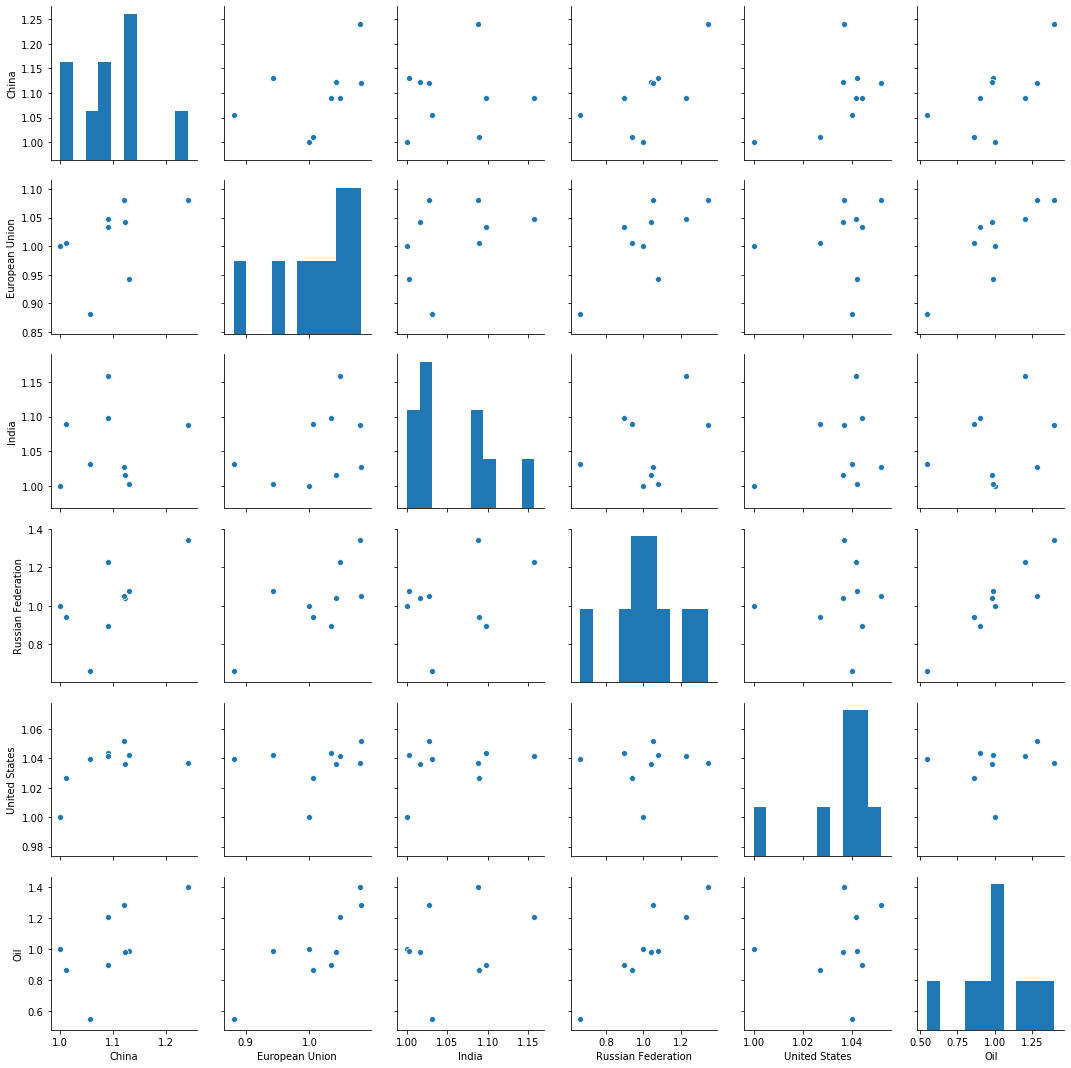

In [20]:
sns.pairplot(gdp_oil)


Из грфика видно, ВВП РФ практически линейно связано с ценами на нефть.

## Imports of goods and services (current US$)


In [21]:
igs = pd.read_csv('igs2010.csv')
# igs = igs[['Location','Time', 'Value']]
igs.head()

,LOCATION,Location,SUBJECT,Subject,TIME,Time,Value,Flag Codes,Flags
0,EAR,Early-demographic dividend,NE-IMP-GNFS-CD,Imports of goods and services (current US$),2010,2010,2.342494e+12,NaN,NaN
1,EAR,Early-demographic dividend,NE-IMP-GNFS-CD,Imports of goods and services (current US$),2011,2011,2.784157e+12,NaN,NaN
2,EAR,Early-demographic dividend,NE-IMP-GNFS-CD,Imports of goods and services (current US$),2012,2012,2.983228e+12,NaN,NaN
3,EAR,Early-demographic dividend,NE-IMP-GNFS-CD,Imports of goods and services (current US$),2013,2013,3.007239e+12,NaN,NaN
4,EAR,Early-demographic dividend,NE-IMP-GNFS-CD,Imports of goods and services (current US$),2014,2014,3.064990e+12,NaN,NaN


<BarContainer object of 13 artists>

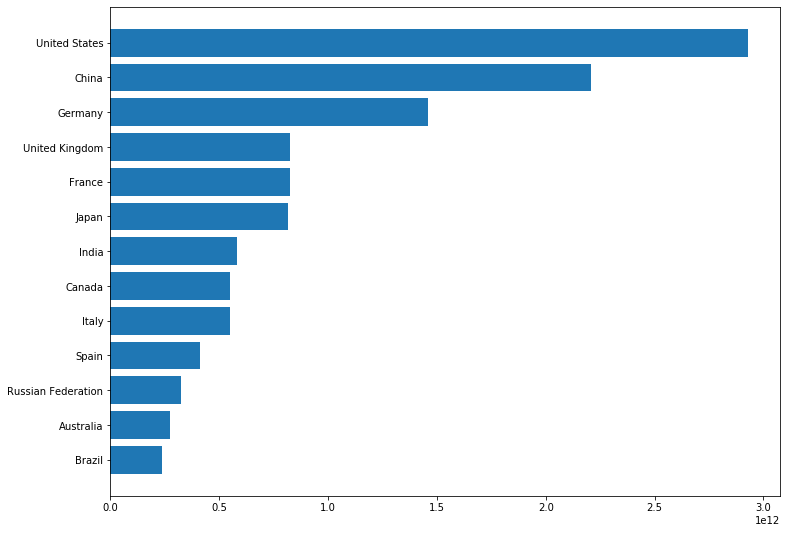

In [22]:
igs_filtr = igs[(igs['Location'].isin(['Russian Federation',
                                       'United States',
#                                        'European Union',
                                       'China',
                                       'Australia',
                                       'Germany',
                                       'Japan', 
                                       'United Kingdom', 
                                       'India', 
                                       'France',
                                       'Italy', 
                                       'Brazil', 
                                       'Canada',
                                       'Spain']))].sort_values('Value')
plt.barh(igs_filtr[igs_filtr['Time']==2017]['Location'],
         igs_filtr[igs_filtr['Time']==2017]['Value'])


In [23]:
fig = px.choropleth(igs[(igs['Time'] == 2018) & (igs['Value'] < (10**12))], 
                    locations="LOCATION",
                    color="Value", 
                    hover_name="Location", 
                    color_continuous_scale=px.colors.sequential.Plasma,
                   )
fig.show()

Сравниваем параметр Imports of goods and services для топа стран.

Можем увидеть, что Россия также не входит в top10

Давайте дальше посмотрим на днамику этого показателя

# IGS dinamic analys

In [24]:
igs_dinamics = igs[(igs['Location'].isin(['Russian Federation',
                                       'United States',
                                       'European Union',
                                       'China',
#                                        'Australia',
#                                        'Germany',
#                                        'Japan', 
#                                        'United Kingdom',
                                       'India', 
#                                        'France',
#                                        'Iataly', 
#                                        'Brazil', 
#                                        'Canada',
#                                        'Spain'
                                      ]))]
igs_dinamics = igs_dinamics.pivot(index = 'Time', columns = 'Location', values =  'Value' )
igs_dinamics.head()

Location,China,European Union,India,Russian Federation,United States
Time,,,,,
2010,1.380075e+12,6.391258e+12,4.499743e+11,3.223667e+11,2.360183e+12
2011,1.825403e+12,7.385217e+12,5.666672e+11,4.087767e+11,2.682456e+12
2012,1.943215e+12,6.991420e+12,5.713066e+11,4.470489e+11,2.759851e+12
2013,2.119378e+12,7.229858e+12,5.275555e+11,4.686231e+11,2.764210e+12
2014,2.241289e+12,7.493014e+12,5.292397e+11,4.260622e+11,2.879284e+12


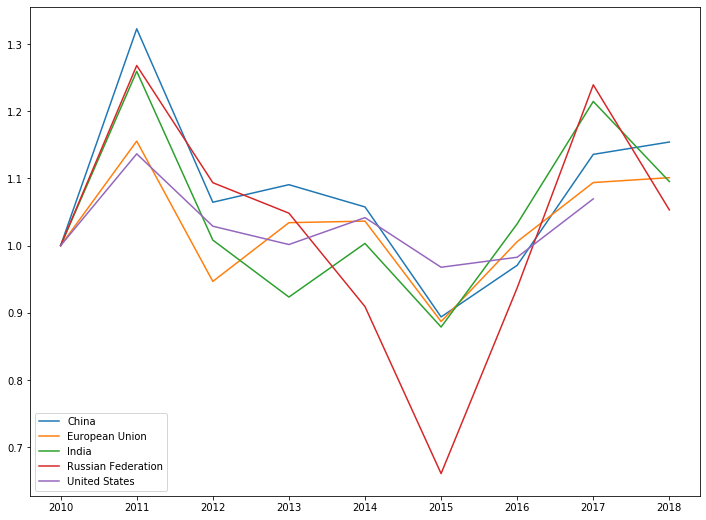

In [25]:
l = len(igs_dinamics)
for i in range(l):
    if i == l-1:
        igs_dinamics.iloc[l-i-1] /= igs_dinamics.iloc[l-i-1]
    else:
        igs_dinamics.iloc[l-i-1] /=  igs_dinamics.iloc[l-i-2]
    
plt.plot(igs_dinamics)
plt.legend(igs_dinamics)

Видно, что в 2015 году практически по всем странам показатель год к году просел, однако такой просадки как в РФ не было у большинства развитсых стран.

Из-за чего такое может быть?

Опять добавить динамику изменения цены на нефть.

In [26]:
igs_oil = igs_dinamics.reset_index().merge(oil, how = 'left', on = 'Time')
igs_oil = igs_oil.set_index('Time')
igs_oil.head()

,China,European Union,India,Russian Federation,United States,Oil
Time,,,,,,
2010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2011,1.322683,1.155519,1.259332,1.268049,1.136546,1.399527
2012,1.064541,0.946678,1.008187,1.093626,1.028852,0.984788
2013,1.090655,1.034104,0.923419,1.048259,1.001579,0.981843
2014,1.057522,1.036399,1.003192,0.909179,1.041630,0.898335


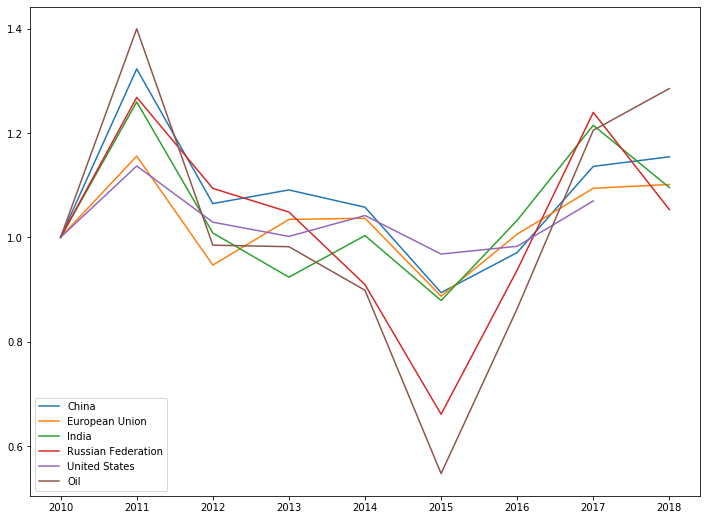

In [27]:
plt.plot(igs_oil)
plt.legend(igs_oil)

Здесь видна абсолютно аналогичная зависимость как и в случае с GDP (с теми же особенностями 2018 года)

/Users/user/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning:

invalid value encountered in greater_equal

/Users/user/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning:

invalid value encountered in less_equal



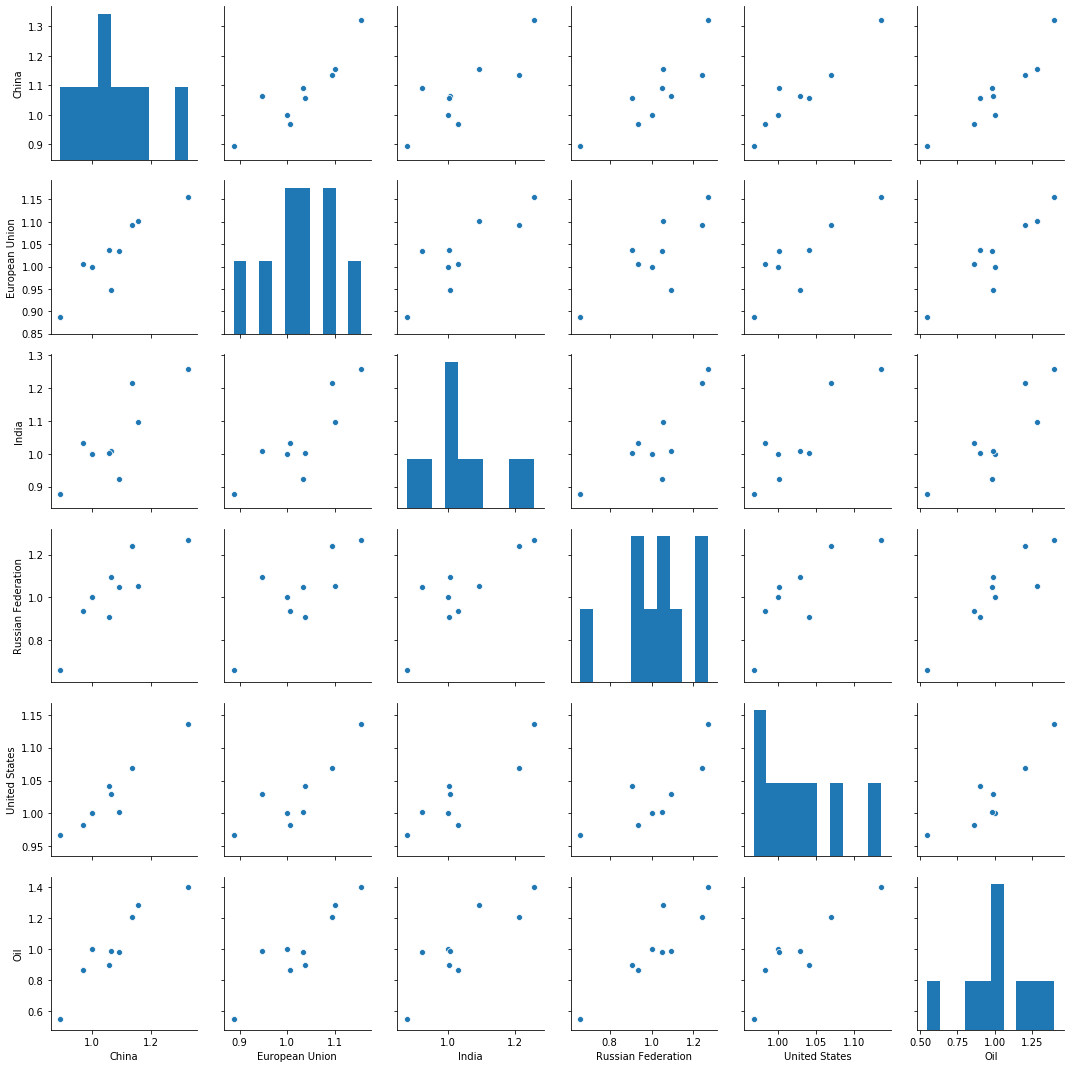

In [28]:
sns.pairplot(igs_oil)

Отсюда можем видеть на сколько сильно экономика России зависит от цены на нефть. Также сильно как зависит и igs.

Те основной импортируемый товар, как и основа нашей экономики - нефть. (Небезызвестных факт доказанный на цифрах :) )